## Analyse des Correspondances Multiples

On importe la librairie pandas pour charger les données (races canines), ainsi que la classe MCA du package fanalysis.

In [1]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [12]:
df = pd.read_table("data/data_acm.txt", header=0, index_col=0)
df

Taille    Poids Velocite Intelligence Affection Agressivite  \
Chien                                                                           
Beauceron       Taille++   Poids+  Veloc++      Intell+    Affec+     Agress+   
Basset           Taille-   Poids-   Veloc-      Intell-    Affec-     Agress+   
Berger All      Taille++   Poids+  Veloc++     Intell++    Affec+     Agress+   
Boxer            Taille+   Poids+   Veloc+      Intell+    Affec+     Agress+   
Bull-Dog         Taille-   Poids-   Veloc-      Intell+    Affec+     Agress-   
Bull-Mastif     Taille++  Poids++   Veloc-     Intell++    Affec-     Agress+   
Caniche          Taille-   Poids-   Veloc+     Intell++    Affec+     Agress-   
Chihuahua        Taille-   Poids-   Veloc-      Intell-    Affec+     Agress-   
Cocker           Taille+   Poids-   Veloc-      Intell+    Affec+     Agress+   
Colley          Taille++   Poids+  Veloc++      Intell+    Affec+     Agress-   
Dalmatien        Taille+   Poids+   Veloc+      Intell+    Affec+     Agress-   
Doberman        Taille++   Poids+  Veloc++     Intell++    Affec-     Agress+   
Dogue All       Taille++  Poids++  Veloc++      Intell-    Affec-     Agress+   
Epag. Breton     Taille+   Poids+   Veloc+     Intell++    Affec+     Agress-   
Epag. Français  Taille++   Poids+   Veloc+      Intell+    Affec-     Agress-   
Fox-Hound       Taille++   Poids+  Veloc++      Intell-    Affec-     Agress+   
Fox-Terrier      Taille-   Poids-   Veloc+      Intell+    Affec+     Agress+   
Gd Bleu Gasc    Taille++   Poids+   Veloc+      Intell-    Affec-     Agress+   
Labrador         Taille+   Poids+   Veloc+      Intell+    Affec+     Agress-   
Levrier         Taille++   Poids+  Veloc++      Intell-    Affec-     Agress-   
Mastiff         Taille++  Poids++   Veloc-      Intell-    Affec-     Agress+   
Pekinois         Taille-   Poids-   Veloc-      Intell-    Affec+     Agress-   
Pointer         Taille++   Poids+  Veloc++     Intell++    Affec-     Agress-   
St-Bernard      Taille++  Poids++   Veloc-      Intell+    Affec-     Agress+   
Setter          Taille++   Poids+  Veloc++      Intell+    Affec-     Agress-   
Teckel           Taille-   Poids-   Veloc-      Intell+    Affec+     Agress-   
Terre-Neuve     Taille++  Poids++   Veloc-      Intell+    Affec-     Agress-   

                 Fonction  
Chien                      
Beauceron         utilite  
Basset             chasse  
Berger All        utilite  
Boxer           compagnie  
Bull-Dog        compagnie  
Bull-Mastif       utilite  
Caniche         compagnie  
Chihuahua       compagnie  
Cocker          compagnie  
Colley          compagnie  
Dalmatien       compagnie  
Doberman          utilite  
Dogue All         utilite  
Epag. Breton       chasse  
Epag. Français     chasse  
Fox-Hound          chasse  
Fox-Terrier     compagnie  
Gd Bleu Gasc       chasse  
Labrador           chasse  
Levrier            chasse  
Mastiff           utilite  
Pekinois        compagnie  
Pointer            chasse  
St-Bernard        utilite  
Setter             chasse  
Teckel          compagnie  
Terre-Neuve       utilite

In [3]:
X = df.values

In [8]:
df.describe()

Taille   Poids Velocite Intelligence Affection Agressivite  \
count         27      27       27           27        27          27   
unique         3       3        3            3         2           2   
top     Taille++  Poids+   Veloc-      Intell+    Affec+     Agress-   
freq          15      14       10           13        14          14   

         Fonction  
count          27  
unique          3  
top     compagnie  
freq           10

On crée une instance de la classe MCA, en lui passant ici des étiquettes pour les lignes et les variables. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.

In [4]:
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values)

On estime le modèle en appliquant la méthode fit de la classe MCA sur le jeu de données.

In [5]:
my_mca.fit(X)

MCA(row_labels=array(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog',
       'Bull-Mastif', 'Caniche', 'Chihuahua', 'Cocker', 'Colley',
       'Dalmatien', 'Doberman', 'Dogue All', 'Epag. Breton',
       'Epag. Français', 'Fox-Hound', 'Fox-Terrier', 'Gd Bleu Gasc',
       'Labrador', 'Levrier', 'Mastiff', 'Pekinois', 'Pointer',
       'St-Bernard', 'Setter', 'Teckel', 'Terre-Neuve'], dtype=object),
    var_labels=array(['Taille', 'Poids', 'Velocite', 'Intelligence', 'Affection',
       'Agressivite', 'Fonction'], dtype=object))

L'exécution de la méthode my_mca.fit(X) provoque a minima le calcul des attributs :

* my_pca.eig_ : valeurs propres
* my_pca.row_coord_ : coordonnées des points lignes
* my_pca.col_coord_ : coordonnées des points colonnes

### 1. Analyse des valeurs propres

L'attribut my_mca.eig_ contient :

* en 1ère ligne : les valeurs propres en valeur absolue
* en 2ème ligne : les valeurs propres en pourcentage de la variance totale
* en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [30]:
print(my_mca.eig_)
print("les valeurs propres de chaque axes : ")
for i in range(len(my_mca.eig_[0])):
    print(f'la valeur propre de l axe, {i+1} est : {my_mca.eig_[0][i]} ')

[[5.21890019e-01 3.58471438e-01 2.22279319e-01 1.61565866e-01
  1.35077985e-01 1.21884489e-01 7.00507128e-02 5.89463453e-02
  2.83064937e-02 2.01549843e-02 9.94171072e-03 5.71635102e-03]
 [3.04435845e+01 2.09108339e+01 1.29662936e+01 9.42467551e+00
  7.87954912e+00 7.10992855e+00 4.08629158e+00 3.43853681e+00
  1.65121213e+00 1.17570742e+00 5.79933126e-01 3.33453810e-01]
 [3.04435845e+01 5.13544184e+01 6.43207119e+01 7.37453875e+01
  8.16249366e+01 8.87348651e+01 9.28211567e+01 9.62596935e+01
  9.79109056e+01 9.90866131e+01 9.96665462e+01 1.00000000e+02]]
les valeurs propres de chaque axes : 
la valeur propre de l axe, 1 est : 0.5218900193450743 
la valeur propre de l axe, 2 est : 0.3584714381660685 
la valeur propre de l axe, 3 est : 0.2222793185680434 
la valeur propre de l axe, 4 est : 0.16156586593793268 
la valeur propre de l axe, 5 est : 0.13507798492643067 
la valeur propre de l axe, 6 est : 0.12188448942242344 
la valeur propre de l axe, 7 est : 0.07005071281193694 
la valeur p

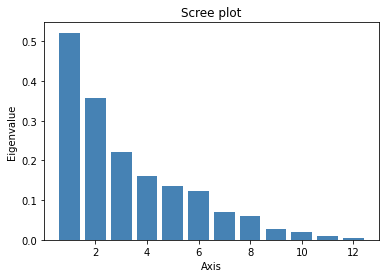

In [31]:
my_mca.plot_eigenvalues()

### Selection des facteurs pertinents 

Un seuil de sélection possible : on sélectionne les facteurs dont les v.p. sont supérieures à la moyenne des v.p.

In [32]:
print("La moyenne des valeurs propres : \n", np.average(my_mca.eig_[0]))
print("La moyenne des valeurs propres est aussi égale à 1/p : \n", 1/7)
print("On retient donc 4 facteurs")

La moyenne des valeurs propres : 
 0.14285714285714285
La moyenne des valeurs propres est aussi égale à 1/p : 
 0.14285714285714285
On retient donc 4 facteurs


On refait le calcul en gardant uniquement 4 facteurs

In [33]:
#Instanciation
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values[0:6],n_components=4)
#Calcul
my_mca.fit(X)

MCA(n_components=4,
    row_labels=array(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog',
       'Bull-Mastif', 'Caniche', 'Chihuahua', 'Cocker', 'Colley',
       'Dalmatien', 'Doberman', 'Dogue All', 'Epag. Breton',
       'Epag. Français', 'Fox-Hound', 'Fox-Terrier', 'Gd Bleu Gasc',
       'Labrador', 'Levrier', 'Mastiff', 'Pekinois', 'Pointer',
       'St-Bernard', 'Setter', 'Teckel', 'Terre-Neuve'], dtype=object),
    var_labels=array(['Taille', 'Poids', 'Velocite', 'Intelligence', 'Affection',
       'Agressivite'], dtype=object))

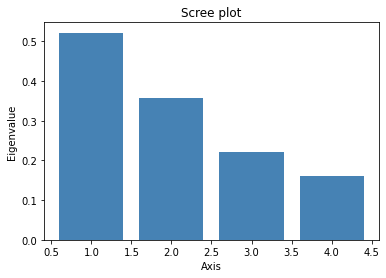

In [34]:
my_mca.plot_eigenvalues()

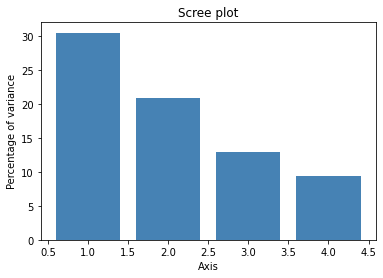

In [35]:
my_mca.plot_eigenvalues(type="percentage")

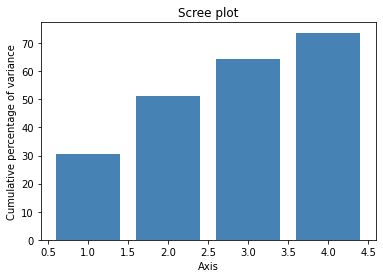

In [36]:
my_mca.plot_eigenvalues(type="cumulative")

Lors de l'exécution de la méthode my_mca.fit(X), les statistiques suivantes ont été calculées :

* my_mca.row_contrib_ : contributions des points lignes à la variance de l'axe
* my_mca.col_contrib_ : contributions des points colonnes à la variance de l'axe
* my_mca.row_cos2_ : cosinus carrés des points lignes
* my_mca.col_cos2_ : cosinus carrés des points colonnes

### 2. Extraction des statistiques sur les points lignes

In [38]:
df_rows = my_mca.row_topandas()
print(df_rows)

                row_coord_dim1  row_coord_dim2  row_coord_dim3  \
Beauceron            -0.441155       -0.162871        0.448259   
Basset                0.135537        0.682819       -0.861841   
Berger All           -0.591242       -0.207171        0.370395   
Boxer                 0.581897       -0.626249        0.735909   
Bull-Dog              1.045779        0.552012       -0.088870   
Bull-Mastif          -0.869452        0.706680        0.565293   
Caniche               0.959804        0.039450       -0.106561   
Chihuahua             0.912405        0.717902       -0.542892   
Cocker                0.801586        0.233950        0.574254   
Colley                0.157359       -0.400105        0.081348   
Dalmatien             0.753317       -0.761401        0.558360   
Doberman             -0.910442       -0.137894        0.182706   
Dogue All            -1.062796        0.562336        0.075475   
Epag. Breton          0.316981       -1.045213        0.171686   
Epag. Fran

In [39]:
# Coordonnées des points lignes
print(my_mca.row_coord_)

[[-0.44115527 -0.16287088  0.44825937 -0.41049917]
 [ 0.13553674  0.68281853 -0.86184144  0.37896587]
 [-0.59124208 -0.20717109  0.37039465 -0.94224571]
 [ 0.58189662 -0.62624912  0.73590935  0.3629583 ]
 [ 1.045779    0.55201245 -0.08887029 -0.1821244 ]
 [-0.86945182  0.70668003  0.56529269 -0.14071272]
 [ 0.9598035   0.03944998 -0.10656055 -0.63418485]
 [ 0.91240528  0.7179021  -0.54289242 -0.11079214]
 [ 0.80158617  0.23394951  0.57425448  0.24311946]
 [ 0.15735858 -0.40010545  0.08134788 -0.42448232]
 [ 0.75331665 -0.76140051  0.55836047  0.31462763]
 [-0.91044208 -0.13789386  0.18270626 -0.73769679]
 [-1.06279584  0.56233554  0.07547518  0.10196367]
 [ 0.31698134 -1.0452129   0.17168623  0.01975952]
 [-0.17392151 -0.68406832 -0.24131547  0.45703353]
 [-0.75288368 -0.26929937 -0.69162327  0.13660795]
 [ 0.93847029  0.21890158  0.14885305 -0.05410765]
 [-0.47871526 -0.38302729 -0.51778871  0.57669646]
 [ 0.46706814 -1.00091269  0.24955096  0.55150605]
 [-0.58146366 -0.40445076 -0.86

In [40]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[1.38114789e+00 2.74074456e-01 3.34808087e+00 3.86287983e+00]
 [1.30368098e-01 4.81717329e+00 1.23763313e+01 3.29220462e+00]
 [2.48077805e+00 4.43445209e-01 2.28594930e+00 2.03523687e+01]
 [2.40297312e+00 4.05206061e+00 9.02372427e+00 3.01995226e+00]
 [7.76134661e+00 3.14832403e+00 1.31598327e-01 7.60366380e-01]
 [5.36473509e+00 5.15973404e+00 5.32456228e+00 4.53892840e-01]
 [6.53765362e+00 1.60796027e-02 1.89203916e-01 9.21973306e+00]
 [5.90789573e+00 5.32490817e+00 4.91094114e+00 2.81387313e-01]
 [4.55992476e+00 5.65491352e-01 5.49472506e+00 1.35495872e+00]
 [1.75726835e-01 1.65398134e+00 1.10262971e-01 4.13053049e+00]
 [4.02728507e+00 5.98974039e+00 5.19477213e+00 2.26923954e+00]
 [5.88249941e+00 1.96458832e-01 5.56216689e-01 1.24750533e+01]
 [8.01598568e+00 3.26717764e+00 9.49173318e-02 2.38329339e-01]
 [7.13057619e-01 1.12873293e+01 4.91143190e-01 8.95033384e-03]
 [2.14666295e-01 4.83482368e+00 9.70303283e-01 4.78831543e+00]
 [4.02265708e+00 7.49294174e-01 7.97033128e+00 4.277978

In [41]:
# Cos2 des points lignes
print(my_mca.row_cos2_)

[[1.48304749e-01 2.02143137e-02 1.53119633e-01 1.28409363e-01]
 [9.55289834e-03 2.42455289e-01 3.86256515e-01 7.46829160e-02]
 [2.10780985e-01 2.58796889e-02 8.27237430e-02 5.35339267e-01]
 [1.89830836e-01 2.19871707e-01 3.03615353e-01 7.38564700e-02]
 [6.61891565e-01 1.84418616e-01 4.77991530e-03 2.00744333e-02]
 [3.54456410e-01 2.34162549e-01 1.49836814e-01 9.28407214e-03]
 [4.39745890e-01 7.42900690e-04 5.42038417e-03 1.91985686e-01]
 [4.52989296e-01 2.80441840e-01 1.60376198e-01 6.67928927e-03]
 [3.39265373e-01 2.88990386e-02 1.74119693e-01 3.12089061e-02]
 [2.07269604e-02 1.33999662e-01 5.53920306e-03 1.50825226e-01]
 [3.21974270e-01 3.28921575e-01 1.76886774e-01 5.61642234e-02]
 [4.93504077e-01 1.13207703e-02 1.98743500e-02 3.23997668e-01]
 [5.60609130e-01 1.56946469e-01 2.82728000e-03 5.16001973e-03]
 [4.67003194e-02 5.07764096e-01 1.37000899e-02 1.81470101e-04]
 [2.30504143e-02 3.56591577e-01 4.43754163e-02 1.59172577e-01]
 [3.86826102e-01 4.94915074e-02 3.26436865e-01 1.273538

### 3. Extraction des statistiques sur les points colonnes

In [42]:
df_cols = my_mca.col_topandas()
print(df_cols)

                col_coord_dim1  col_coord_dim2  col_coord_dim3  \
col0_Taille+          0.808630       -1.068880        0.971339   
col0_Taille++        -0.818640       -0.031308       -0.029226   
col0_Taille-          1.176637        0.830575       -0.631186   
col1_Poids+          -0.266908       -0.867038       -0.065124   
col1_Poids++         -1.121868        1.186754        0.822402   
col1_Poids-           1.168256        0.775596       -0.400035   
col2_Veloc+           0.582227       -0.885741        0.264785   
col2_Veloc++         -0.804225       -0.409098       -0.308913   
col2_Veloc-           0.258021        1.076781        0.066194   
col3_Intell+          0.368503       -0.164743        0.501072   
col3_Intell++        -0.390477       -0.350408        0.244099   
col3_Intell-         -0.305960        0.530513       -0.997317   
col4_Affec+           0.777195       -0.139796        0.298239   
col4_Affec-          -0.836979        0.150550       -0.321181   
col5_Agres

In [43]:
# Coordonnées des points colonnes
print(my_mca.col_coord_)

[[ 0.80862952 -1.06888021  0.97133875  0.7423617 ]
 [-0.81864044 -0.03130804 -0.02922622 -0.09898535]
 [ 1.176637    0.83057452 -0.63118578 -0.31814689]
 [-0.26690751 -0.86703831 -0.06512362 -0.08979627]
 [-1.12186785  1.18675368  0.82240199  0.57586596]
 [ 1.16825555  0.77559599 -0.4000349  -0.20277276]
 [ 0.58222741 -0.88574061  0.26478507  0.49579513]
 [-0.80422498 -0.40909849 -0.30891338 -0.74246781]
 [ 0.25802055  1.07678113  0.06619399  0.27158493]
 [ 0.36850286 -0.16474272  0.50107234  0.27301136]
 [-0.39047666 -0.35040817  0.24409886 -1.22314684]
 [-0.30595965  0.53051305 -0.9973167   0.47371667]
 [ 0.77719503 -0.1397962   0.2982391  -0.27710836]
 [-0.83697927  0.15054976 -0.32118057  0.29842439]
 [-0.4494831   0.29370416  0.30382939  0.07051149]
 [ 0.41737716 -0.27272529 -0.28212729 -0.06547496]
 [-0.32509034 -0.7959757  -0.86460242  0.47296631]
 [ 1.12245028  0.20783756  0.15454788 -0.19353092]
 [-1.03733622  0.63567571  0.77949288 -0.29017344]]


In [44]:
# Contributions des points colonnes
print(my_mca.col_contrib_)

[[3.31457916e+00 8.43163345e+00 1.12292453e+01 9.02380503e+00]
 [1.01914706e+01 2.17013404e-02 3.04983027e-02 4.81306479e-01]
 [9.82521919e+00 7.12752718e+00 6.63821920e+00 2.32028848e+00]
 [1.01113427e+00 1.55341768e+01 1.41333236e-01 3.69686138e-01]
 [6.37988146e+00 1.03938110e+01 8.04965833e+00 5.43001963e+00]
 [1.10694208e+01 7.10304774e+00 3.04736791e+00 1.07720359e+00]
 [2.74937822e+00 9.26374812e+00 1.33510714e+00 6.43995865e+00]
 [5.90142416e+00 2.22321726e+00 2.04434926e+00 1.62474927e+01]
 [6.74944100e-01 1.71134871e+01 1.04298056e-01 2.41546030e+00]
 [1.78971665e+00 5.20762215e-01 7.76932610e+00 3.17317023e+00]
 [9.27471606e-01 1.08738497e+00 8.50984976e-01 2.93965948e+01]
 [7.59237229e-01 3.32327105e+00 1.89406687e+01 5.87916842e+00]
 [8.57328522e+00 4.03833586e-01 2.96412376e+00 3.52059341e+00]
 [9.23276870e+00 4.34897708e-01 3.19213328e+00 3.79140828e+00]
 [2.66274320e+00 1.65518745e+00 2.85655141e+00 2.11666301e-01]
 [2.47254726e+00 1.53695978e+00 2.65251203e+00 1.965472

In [45]:
# Cos2 des points colonnes
print(my_mca.col_cos2_)

[[0.14860948 0.25966021 0.21443158 0.1252502 ]
 [0.83771522 0.00122524 0.00106771 0.01224762]
 [0.48456612 0.24144891 0.13943842 0.0354261 ]
 [0.07671959 0.80958277 0.00456732 0.00868363]
 [0.2860426  0.32008734 0.15371478 0.07536855]
 [0.57466148 0.25328385 0.06738018 0.01731233]
 [0.14273211 0.33033113 0.02952048 0.10350013]
 [0.32338891 0.08368079 0.04771374 0.27562922]
 [0.03916153 0.68203389 0.00257744 0.04338728]
 [0.12609476 0.02520158 0.23313967 0.06921126]
 [0.04356344 0.03508168 0.01702407 0.42745377]
 [0.03941529 0.11850278 0.41879604 0.09448736]
 [0.65049613 0.02104628 0.0957886  0.08269589]
 [0.65049613 0.02104628 0.0957886  0.08269589]
 [0.18760398 0.08010055 0.08571856 0.00461674]
 [0.18760398 0.08010055 0.08571856 0.00461674]
 [0.05284186 0.31678865 0.37376867 0.11184856]
 [0.74111449 0.02540968 0.01405003 0.02203189]
 [0.4530806  0.17014047 0.25583543 0.03545289]]


### 4. Représentation graphique

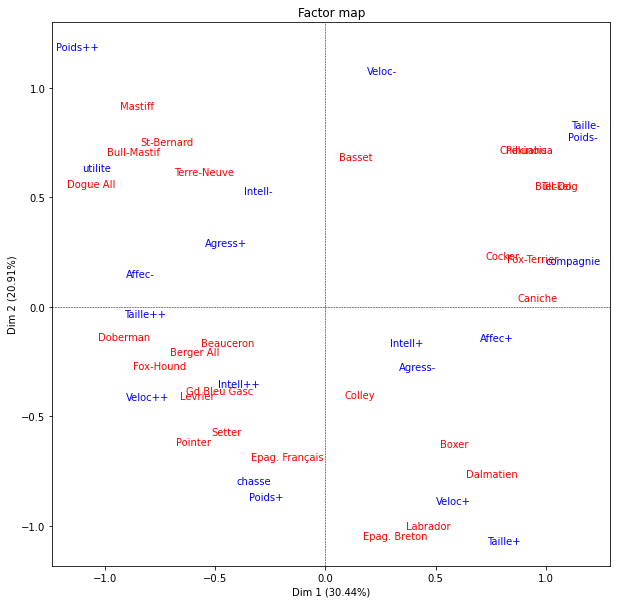

In [46]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2,figsize=(10,10))

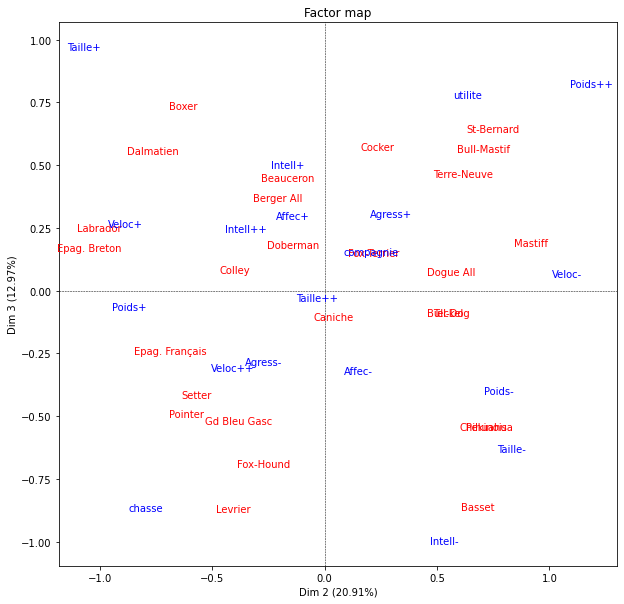

In [47]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=2, num_y_axis=3,figsize=(10,10))

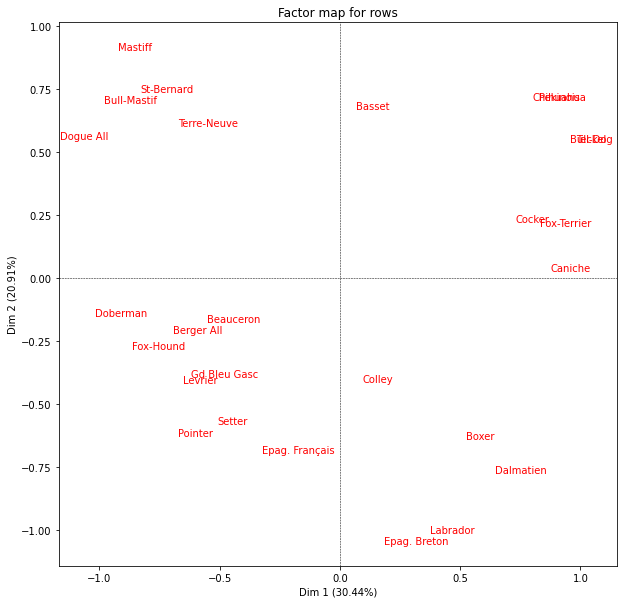

In [48]:
# Mapping des points lignes
my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))

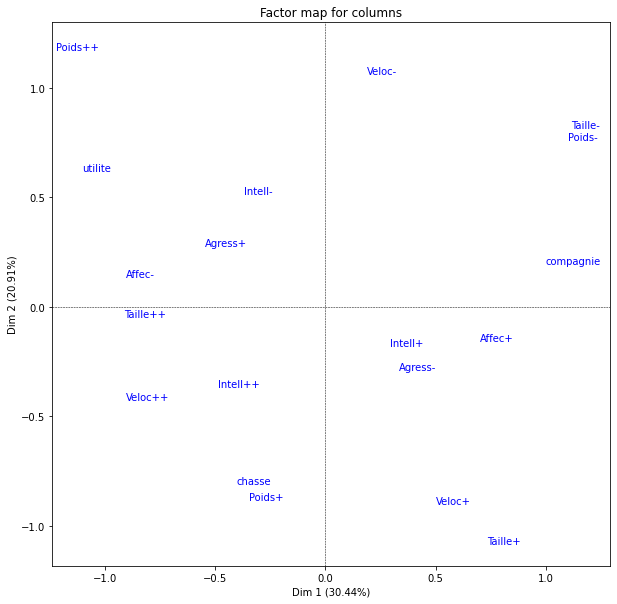

In [49]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))

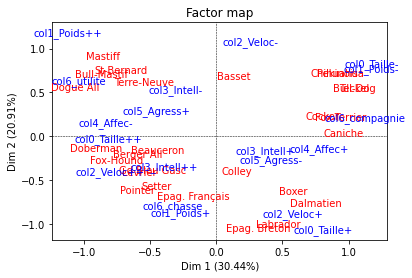

In [50]:
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)

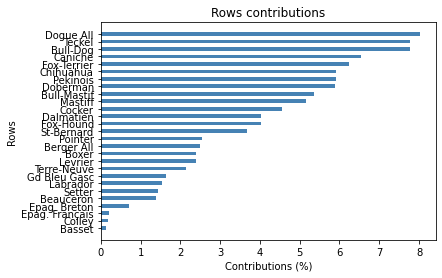

In [51]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_mca.plot_row_contrib(num_axis=1)

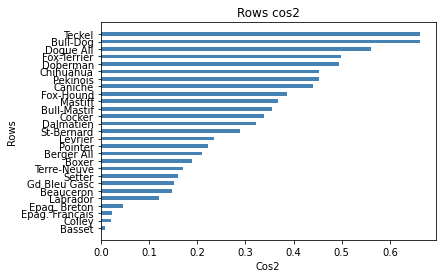

In [52]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_mca.plot_row_cos2(num_axis=1)

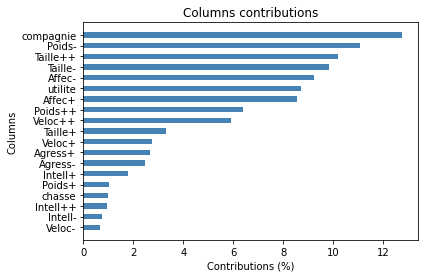

In [53]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_contrib(num_axis=1)

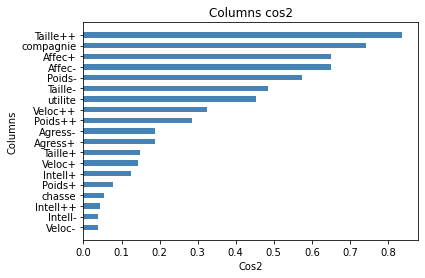

In [54]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_mca.plot_col_cos2(num_axis=1)

Pour ces graphiques produits par les méthodes plot_row_contrib, plot_row_cos2, plot_col_contrib, plot_col_cos2, on peut se limiter à visualiser les x valeurs les plus grandes via le paramètre nb_values.

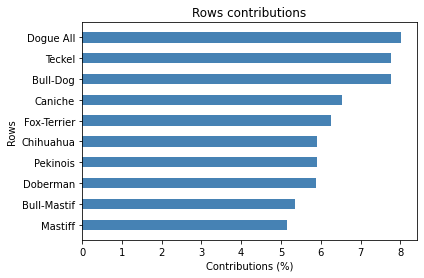

In [55]:
my_mca.plot_row_contrib(num_axis=1, nb_values=10)